<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_3_Machine_Learning_Model_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mohamad Rayi Dwi Putra
NIM : 1103213070
Lecture 3 Model KNN
Dataset Iris.csv
Dokumentasi ChatGPT : https://chat.openai.com/share/fdd9cf81-9134-4541-a95b-c04f99c70db7

Library

In [3]:
# Import library yang diperlukan
import pandas as pd  # Import library pandas untuk manipulasi data
from sklearn.model_selection import train_test_split  # Import modul train_test_split dari scikit-learn untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import StandardScaler  # Import StandardScaler untuk standarisasi fitur
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier untuk model KNN
from sklearn.metrics import classification_report, confusion_matrix  # Import classification_report dan confusion_matrix untuk evaluasi model
import matplotlib.pyplot as plt  # Import matplotlib untuk visualisasi
import seaborn as sns  # Import seaborn untuk visualisasi heatmap


Mount Google Drive

In [4]:
# Mount Google Drive jika menggunakan Google Colab
from google.colab import drive  # Import modul drive dari library google.colab untuk mount Google Drive
drive.mount('/content/drive')  # Mount Google Drive pada Colab

# Load dataset dari CSV
# Ganti 'path_to_csv_file' dengan path sesuai lokasi file CSV Anda di Google Drive
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/iris.data.csv', header=None, delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pembuatan Model

In [5]:
# Menamai kolom sesuai dengan deskripsi yang Anda berikan
dataset.columns = ['feature1', 'feature2', 'feature3', 'feature4', 'species']  # Menamai kolom sesuai dengan deskripsi dataset

# Menampilkan 5 baris pertama dari dataset
print(dataset.head())  # Menampilkan 5 baris pertama dari dataset untuk memeriksa apakah dataset telah dimuat dengan benar

# Memisahkan fitur (features) dan target (label)
X = dataset.drop('species', axis=1)  # Memisahkan kolom target dari dataset dan menyimpannya di variabel X
y = dataset['species']  # Menyimpan kolom target ke dalam variabel y

# Membagi data menjadi data latih dan data uji (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Memisahkan data menjadi data latih dan data uji dengan rasio 80:20

# Standarisasi fitur-fitur
scaler = StandardScaler()  # Membuat objek StandardScaler untuk standarisasi fitur
X_train = scaler.fit_transform(X_train)  # Melakukan standarisasi pada data latih
X_test = scaler.transform(X_test)  # Melakukan standarisasi pada data uji

# Membuat model KNN
classifier = KNeighborsClassifier(n_neighbors=5)  # Membuat objek KNeighborsClassifier dengan 5 tetangga terdekat
classifier.fit(X_train, y_train)  # Melatih model KNN menggunakan data latih

   feature1  feature2  feature3  feature4      species
0       5.1       3.5       1.4       0.2  Iris-setosa
1       4.9       3.0       1.4       0.2  Iris-setosa
2       4.7       3.2       1.3       0.2  Iris-setosa
3       4.6       3.1       1.5       0.2  Iris-setosa
4       5.0       3.6       1.4       0.2  Iris-setosa


KNeighborsClassifier()

Hasil Prediksi Dan Evaluasi Model


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



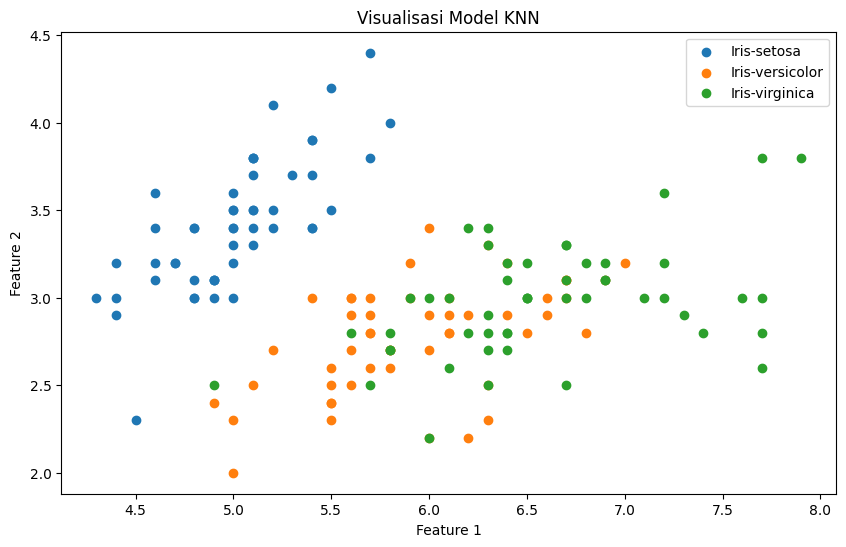

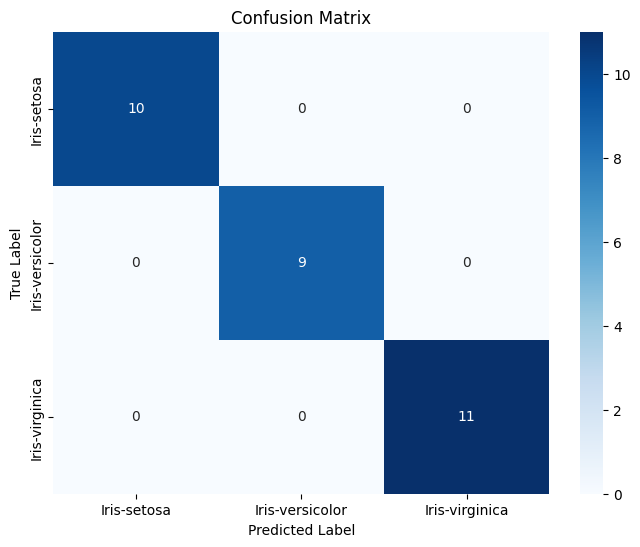

In [6]:
# Melakukan prediksi pada data uji
y_pred = classifier.predict(X_test)  # Melakukan prediksi kelas target untuk data uji

# Menampilkan hasil evaluasi model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Menampilkan confusion matrix untuk evaluasi model
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Menampilkan classification report untuk evaluasi model

# Visualisasi model KNN
# Misalnya, jika Anda memiliki 2 fitur (feature1 dan feature2), Anda dapat memvisualisasikan hubungan antara kelas dan fitur-fiturnya
plt.figure(figsize=(10, 6))

# Pilih dua fitur pertama
X_visualization = X.iloc[:, :2]

# Plot setiap kelas dengan warna yang berbeda
for species in dataset['species'].unique():
    plt.scatter(X_visualization.loc[y == species, 'feature1'],
                X_visualization.loc[y == species, 'feature2'],
                label=species)

plt.title('Visualisasi Model KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Visualisasi Confusion Matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
